In [1]:
import spot, buddy
import random
from IPython.display import display
import WBA_utils
from copy import deepcopy as deepcopy
import time

In [2]:
# Test automata

all_WBA = ["""HOA: v1
States: 4
Start: 0
AP: 2 "a" "b"
acc-name: generalized-Buchi 2
Acceptance: 2 Inf(0)&Inf(1)
properties: trans-labels explicit-labels trans-acc
name: "does not have states outside of SCC"
--BODY--
State: 0
[0&!1] 1 <-2> {1}
State: 1
[!0&1] 2
[0 | 1] 1 <1>
State: 2
[0&!1] 3 <-2>{0}
State: 3
[!0&1] 0
--END--
""",
"""HOA: v1
States: 5
Start: 4
AP: 2 "a" "b"
acc-name: generalized-Buchi 2
Acceptance: 2 Inf(0)&Inf(1)
properties: trans-labels explicit-labels trans-acc
name: "needs a specific entering state in SCC"
--BODY--
State: 0
[0&!1] 1 <-12> {1}
State: 1
[!0&1] 2
[0 | 1] 1 <1>
State: 2
[0&!1] 3 <-2>{0}
State: 3
[!0&1] 0 <-1>
State: 4
[!0] 0
[0] 3 <20>
--END--
""",
"""HOA: v1
States: 5
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 2
Acceptance: 2 Inf(0)&Inf(1)
name: "needs two acc_edges to build loop"
--BODY--
State: 0
[t] 1
[t] 3
State: 1
[t] 2 {0}
State: 2
[t] 3 {1}
State: 3
[t] 4 {0}
State: 4
[t] 1 {1}
--END--
""",
"""HOA: v1
States: 5
Start: 4
AP: 2 "a" "b"
acc-name: generalized-Buchi 2
Acceptance: 2 Inf(0)&Inf(1)
properties: trans-labels explicit-labels trans-acc
name: "needs two runs to find non-negative loop"
--BODY--
State: 0
[0&!1] 1 <-12> {1}
State: 1
[!0&1] 2
[0 | 1] 1 <1>
State: 2
[0&!1] 3 <-2>
State: 3
[!0&1] 0 <-1> {0}
State: 4
[!0] 0
[0] 3 <20>
--END--
""",
"""HOA: v1
States: 2
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 1
Acceptance: 1 Inf(0)
name: "only one color"
--BODY--
State: 0
[t] 1
State: 1
[t] 0 {0}
--END--""",
"""HOA: v1
States: 3
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 3
Acceptance: 3 Inf(0)&Inf(1)&Inf(2)
name: "three colors"
--BODY--
State: 0
[t] 1 {0}
State: 1
[t] 2 {1}
State: 2
[t] 0 {2}
--END--
""",
"""HOA: v1
States: 2
Start: 0
AP: 1 "a"
acc-name: generalized-Buchi 1
Acceptance: 1 Inf(0)
name: "color on selfloop"
--BODY--
State: 0
[t] 1
State: 1
[t] 0 <1>
[t] 1 <-1> {0}
--END--
"""
]

# Büchi-Energy Problem
## For weighted buchi automata

---------------
  Test case 0
---------------
Original automaton


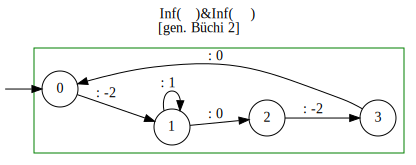

Prefix energy per state
array('q', [28, 30, 30, 28])
Current optimal predescessor
array('Q', [5, 3, 2, 4])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


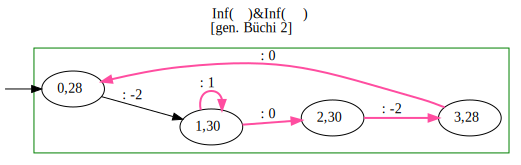

Checking SCC 0
Degeneralized SCC has: 8 states, 10 edges and 1 back-edges.
Current SCC with: 8 states and 1 back-edges
{0: 0, 1: 1, 2: 2, 3: 3}


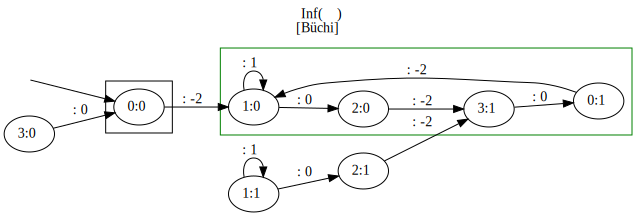

Analysing backedge 0:1 -> 1:0.
We start with 30 energy in state 1:0.
array('q', [-1, 30, 30, -1, 28, -1, -1, 28]) array('Q', [0, 0, 3, 0, 10, 0, 0, 7])
We restart with 26 energy in state 1:0.
array('q', [-1, 30, 30, -1, 28, -1, -1, 28]) array('Q', [0, 5, 3, 0, 10, 0, 0, 7])
We arrived with 26 energy in state 1:0.
We found a non-negative loop using edge 0:1 -> 1:0 in the second iteration.


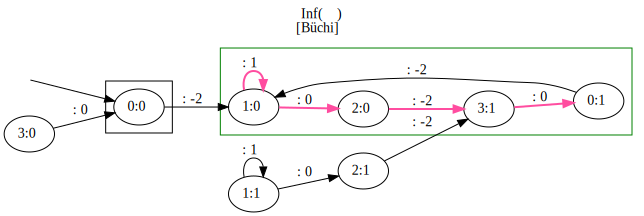

---------------
  Test case 1
---------------
Original automaton


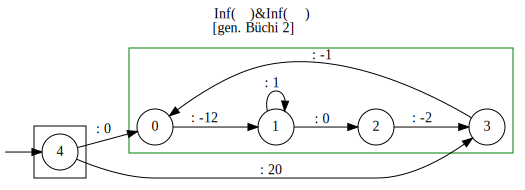

Prefix energy per state
array('q', [29, 30, 30, 30, 10])
Current optimal predescessor
array('Q', [5, 3, 2, 7, 0])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


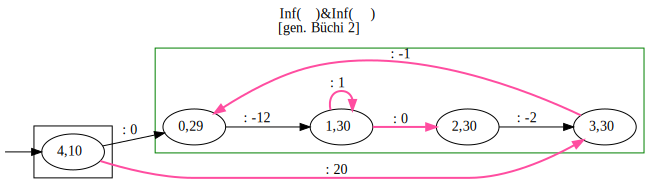

Checking SCC 0
Degeneralized SCC has: 8 states, 10 edges and 1 back-edges.
Current SCC with: 8 states and 1 back-edges
{0: 0, 1: 1, 2: 2, 3: 3}


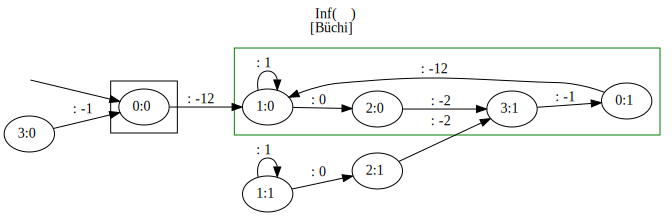

Analysing backedge 0:1 -> 1:0.
We start with 30 energy in state 1:0.
array('q', [-1, 30, 30, -1, 27, -1, -1, 28]) array('Q', [0, 0, 3, 0, 10, 0, 0, 7])
We restart with 15 energy in state 1:0.
array('q', [-1, 30, 30, -1, 27, -1, -1, 28]) array('Q', [0, 5, 3, 0, 10, 0, 0, 7])
We arrived with 15 energy in state 1:0.
We found a non-negative loop using edge 0:1 -> 1:0 in the second iteration.


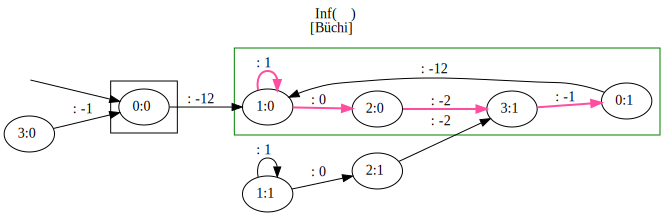

---------------
  Test case 2
---------------
Original automaton


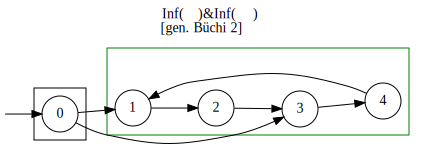

Prefix energy per state
array('q', [10, 10, 10, 10, 10])
Current optimal predescessor
array('Q', [0, 1, 3, 2, 5])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


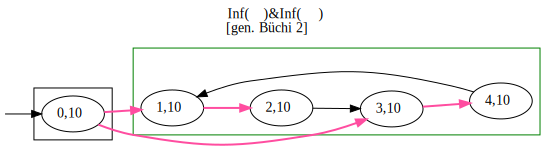

Checking SCC 0
Degeneralized SCC has: 8 states, 8 edges and 2 back-edges.
Current SCC with: 8 states and 2 back-edges
{1: 0, 2: 1, 3: 2, 4: 3}


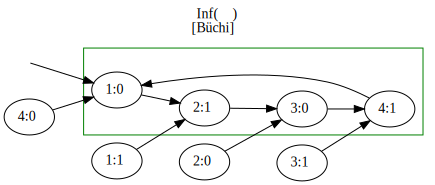

Analysing backedge 2:1 -> 3:0.
We start with 10 energy in state 3:0.
array('q', [10, -1, 10, -1, -1, 10, -1, 10]) array('Q', [8, 0, 0, 0, 0, 1, 0, 5])
We found a non-negative loop using edge 2:1 -> 3:0 directly.


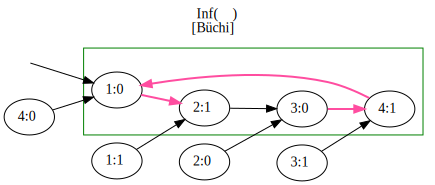

---------------
  Test case 3
---------------
Original automaton


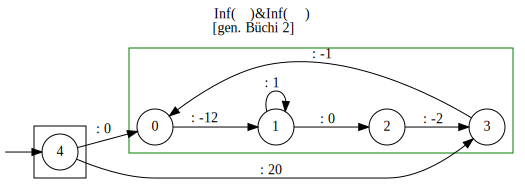

Prefix energy per state
array('q', [29, 30, 30, 30, 10])
Current optimal predescessor
array('Q', [5, 3, 2, 7, 0])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


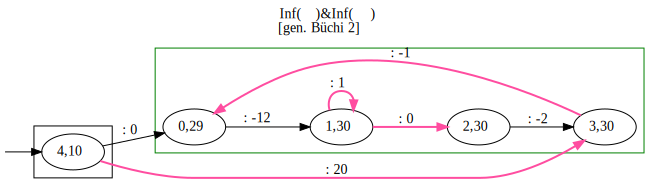

Checking SCC 0
Degeneralized SCC has: 8 states, 10 edges and 1 back-edges.
Current SCC with: 8 states and 1 back-edges
{0: 0, 1: 1, 2: 2, 3: 3}


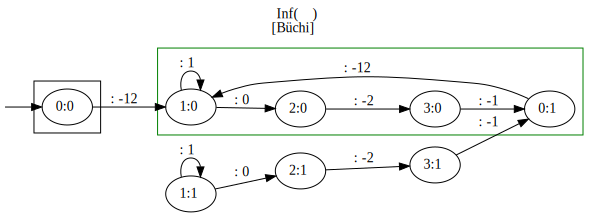

Analysing backedge 0:1 -> 1:0.
We start with 30 energy in state 1:0.
array('q', [-1, 30, 30, 28, 27, -1, -1, -1]) array('Q', [0, 0, 3, 7, 9, 0, 0, 0])
We restart with 15 energy in state 1:0.
array('q', [-1, 30, 30, 28, 27, -1, -1, -1]) array('Q', [0, 5, 3, 7, 9, 0, 0, 0])
We arrived with 15 energy in state 1:0.
We found a non-negative loop using edge 0:1 -> 1:0 in the second iteration.


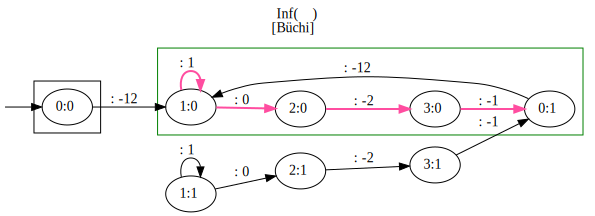

---------------
  Test case 4
---------------
Original automaton


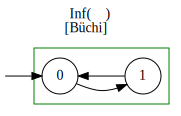

Prefix energy per state
array('q', [10, 10])
Current optimal predescessor
array('Q', [0, 1])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


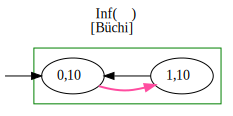

Checking SCC 0
Degeneralized SCC has: 2 states, 2 edges and 1 back-edges.
Current SCC with: 2 states and 1 back-edges
{0: 0, 1: 1}


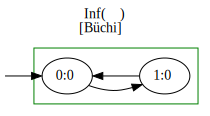

Analysing backedge 1:0 -> 0:0.
We start with 10 energy in state 0:0.
array('q', [10, 10]) array('Q', [0, 1])
We found a non-negative loop using edge 1:0 -> 0:0 directly.


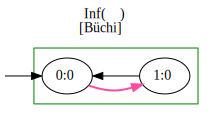

---------------
  Test case 5
---------------
Original automaton


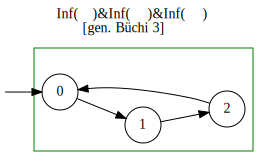

Prefix energy per state
array('q', [10, 10, 10])
Current optimal predescessor
array('Q', [0, 1, 2])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


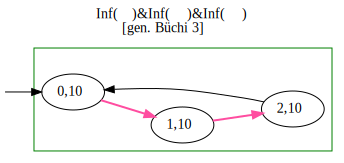

Checking SCC 0
Degeneralized SCC has: 9 states, 9 edges and 1 back-edges.
Current SCC with: 9 states and 1 back-edges
{0: 0, 1: 1, 2: 2}


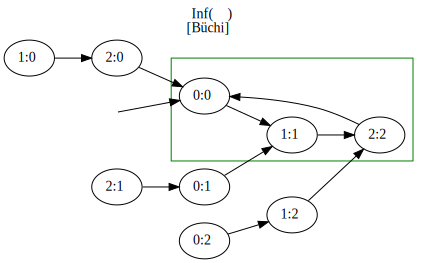

Analysing backedge 2:2 -> 0:0.
We start with 10 energy in state 0:0.
array('q', [10, -1, -1, -1, 10, -1, -1, -1, 10]) array('Q', [0, 0, 0, 0, 1, 0, 0, 0, 5])
We found a non-negative loop using edge 2:2 -> 0:0 directly.


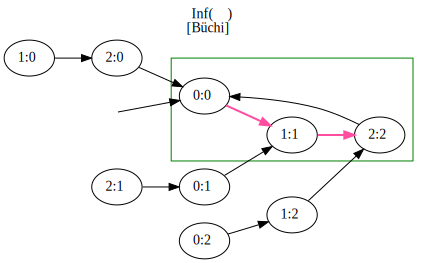

---------------
  Test case 6
---------------
Original automaton


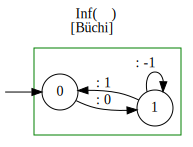

Prefix energy per state
array('q', [30, 30])
Current optimal predescessor
array('Q', [2, 1])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


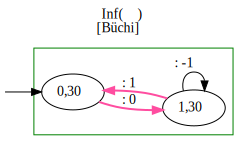

Checking SCC 0
Degeneralized SCC has: 2 states, 3 edges and 1 back-edges.
Current SCC with: 2 states and 1 back-edges
{0: 0, 1: 1}


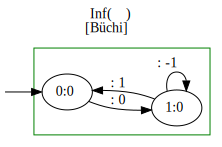

Analysing backedge 1:0 -> 1:0.
We start with 30 energy in state 1:0.
array('q', [30, 30]) array('Q', [2, 0])
We restart with 29 energy in state 1:0.
array('q', [30, 30]) array('Q', [2, 1])
We arrived with 29 energy in state 1:0.
We found a non-negative loop using edge 1:0 -> 1:0 in the second iteration.


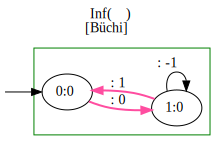

In [3]:
# Solve the test cases
for i, wba in enumerate(all_WBA):
    # input: automaton, start state, WUP, start credit, display?
    print(f"---------------\n  Test case {i}\n---------------")
    WBA_utils.BuechiEnergy(wba, 0, 30, 10, 2) 

## Verifying loop-pumping

Without loop-pumping the number of bellman-ford iterations
increases with the WUP even for larger values.
For small WUP values the number of loops that are pumped and the number
of Bellmann-Ford iterations needed might vary.
This is because some loops already attain the fixpoint during the BF
and do not need to be pumped.

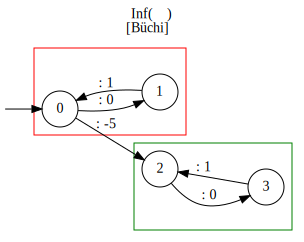

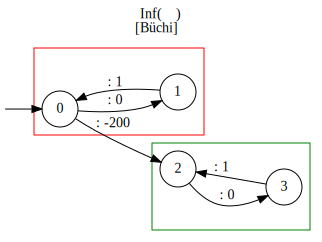

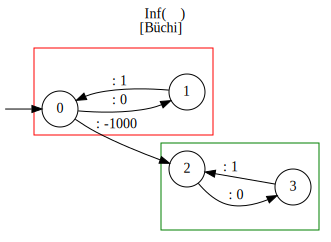

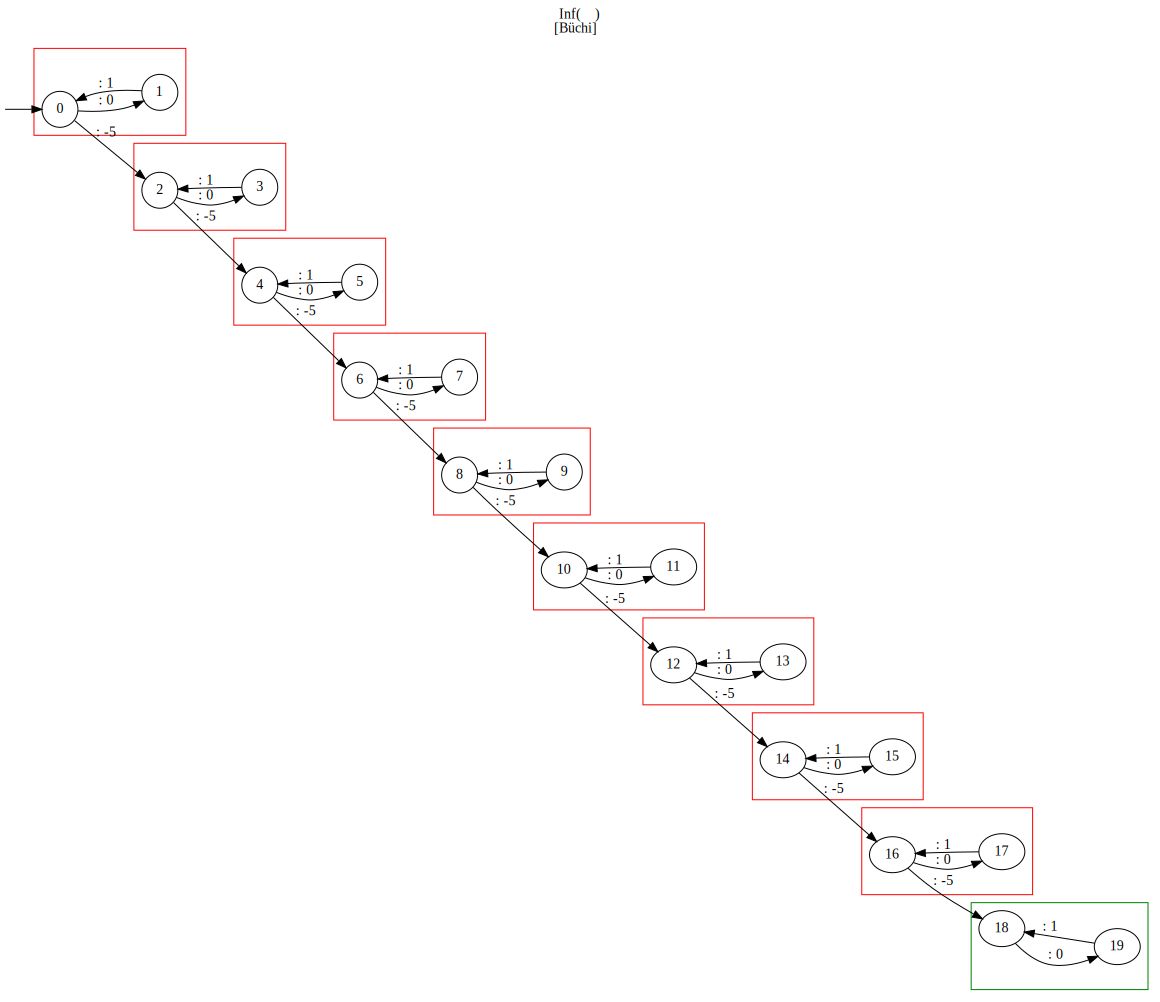

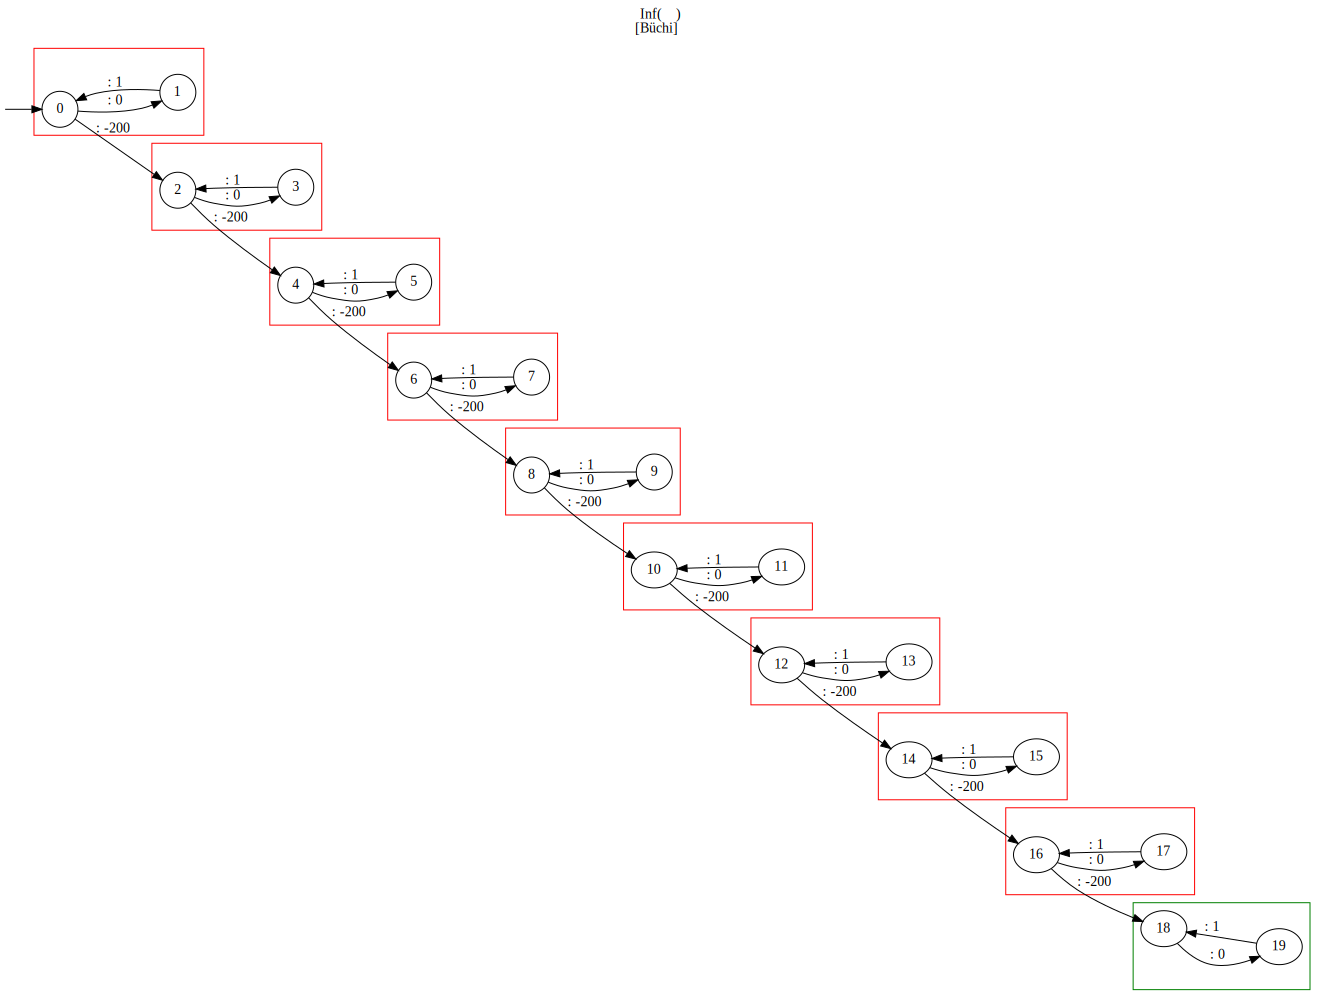

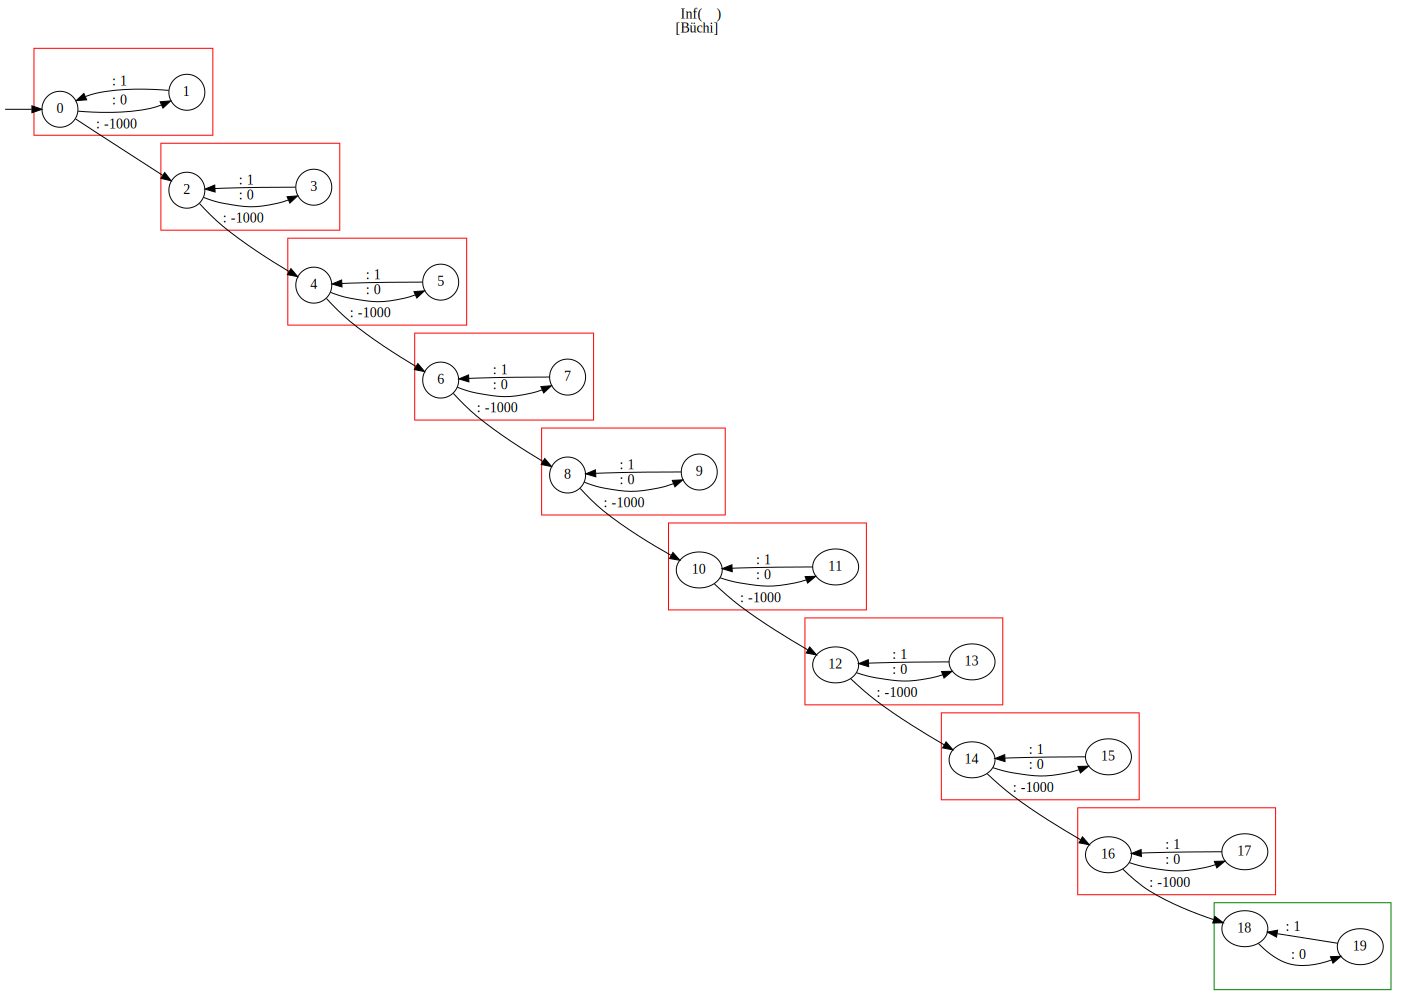




Npairs is  2 ; Wup is  5 
Stats are  {'n_backedges': 1, 'n_bf_iter': 5, 'n_scc': 1, 'n_pump_loop': 2, 'n_propagate': 20}
Npairs is  2 ; Wup is  200 
Stats are  {'n_backedges': 1, 'n_bf_iter': 5, 'n_scc': 1, 'n_pump_loop': 2, 'n_propagate': 20}
Npairs is  2 ; Wup is  1000 
Stats are  {'n_backedges': 1, 'n_bf_iter': 5, 'n_scc': 1, 'n_pump_loop': 2, 'n_propagate': 20}
Npairs is  10 ; Wup is  5 
Stats are  {'n_backedges': 1, 'n_bf_iter': 8, 'n_scc': 1, 'n_pump_loop': 5, 'n_propagate': 174}
Npairs is  10 ; Wup is  200 
Stats are  {'n_backedges': 1, 'n_bf_iter': 13, 'n_scc': 1, 'n_pump_loop': 10, 'n_propagate': 332}
Npairs is  10 ; Wup is  1000 
Stats are  {'n_backedges': 1, 'n_bf_iter': 13, 'n_scc': 1, 'n_pump_loop': 10, 'n_propagate': 332}


In [4]:
res = []
for Npairs in [2, 10]:
    for WUP in [5, 200, 1000]:

        wba = spot.make_twa_graph()
        wba.set_buchi()

        lastState = None
        for i in range(Npairs):
            n = wba.new_states(2)
            idx = wba.new_edge(n, n+1, buddy.bddtrue)
            spot.set_weight(wba, idx, 0)
            idx = wba.new_edge(n+1, n, buddy.bddtrue, [0] if i == Npairs-1 else [])
            spot.set_weight(wba, idx, 1)
            if lastState is not None:
                idx = wba.new_edge(lastState, n, buddy.bddtrue)
                spot.set_weight(wba, idx, -WUP)
            lastState = n
        display(wba.show("tsbrg"))
        WBA_utils.reset_stats()
        WBA_utils.BuechiEnergy(wba, 0, WUP, 0, 0)
        stats = WBA_utils.get_stats()
        res.append((Npairs, WUP, deepcopy(stats)))
    print("\n\n")
for npairs, wup, stats in res:
    print("Npairs is ", npairs, "; Wup is ", wup, "\nStats are ", stats)

## Another parametric example
This example shows the effectiveness of pumploop and that the total runtime does indeed
stabilize if WUP is large enough

wba has  3  states for  2 colors.


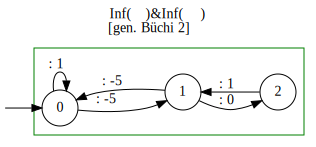

wba has  3  states for  2 colors.


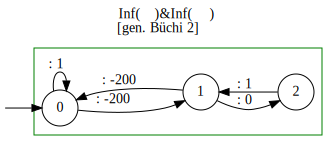

wba has  3  states for  2 colors.


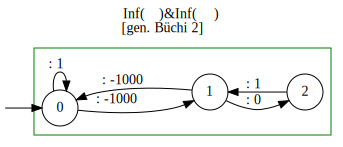

wba has  3  states for  2 colors.


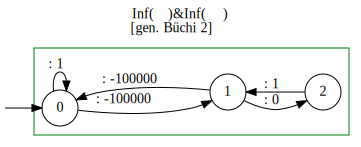

wba has  3  states for  2 colors.


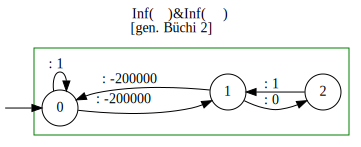

wba has  3  states for  2 colors.


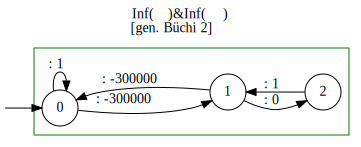

wba has  15  states for  5 colors.


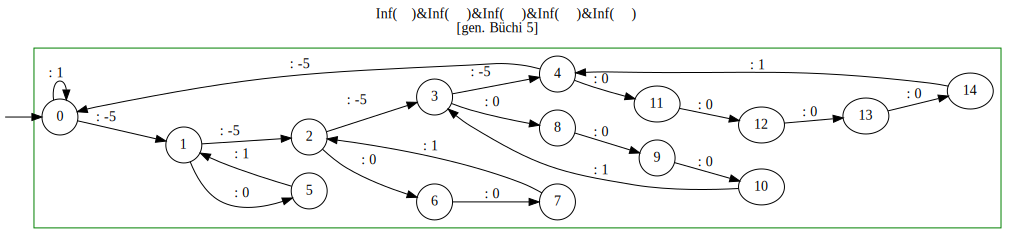

wba has  15  states for  5 colors.


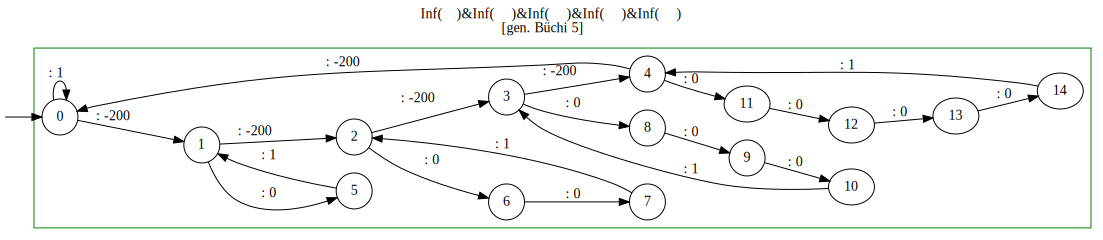

wba has  15  states for  5 colors.


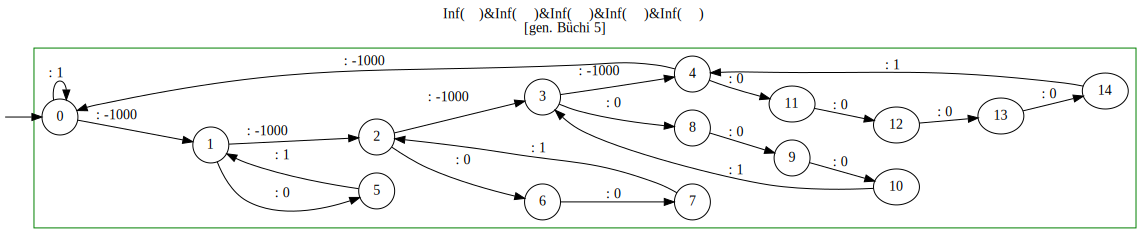

wba has  15  states for  5 colors.


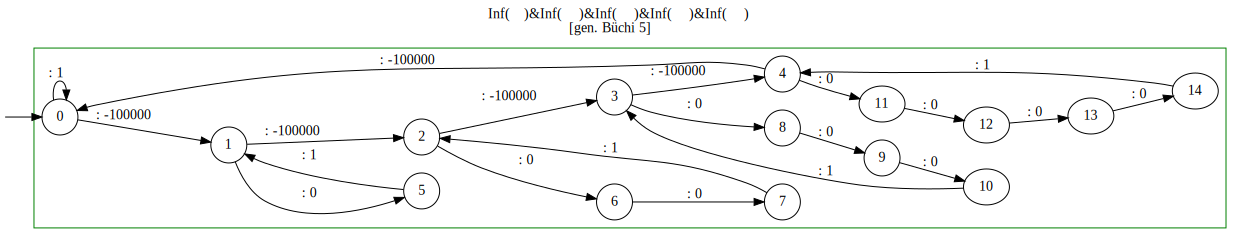

wba has  15  states for  5 colors.


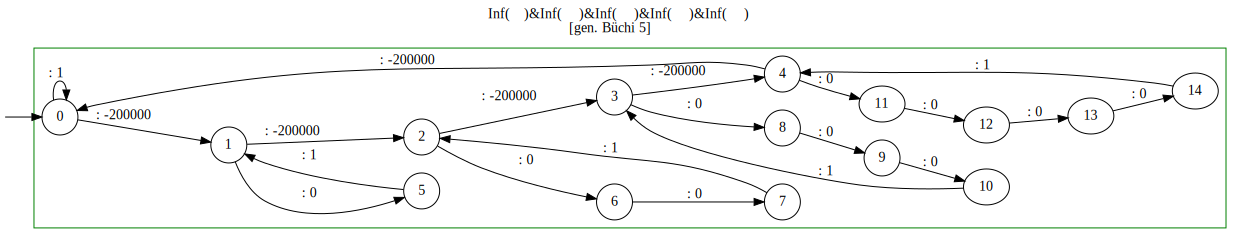

wba has  15  states for  5 colors.


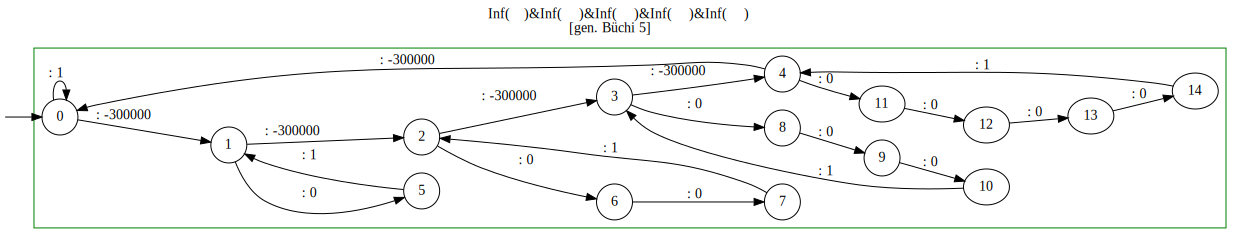

wba has  36  states for  8 colors.


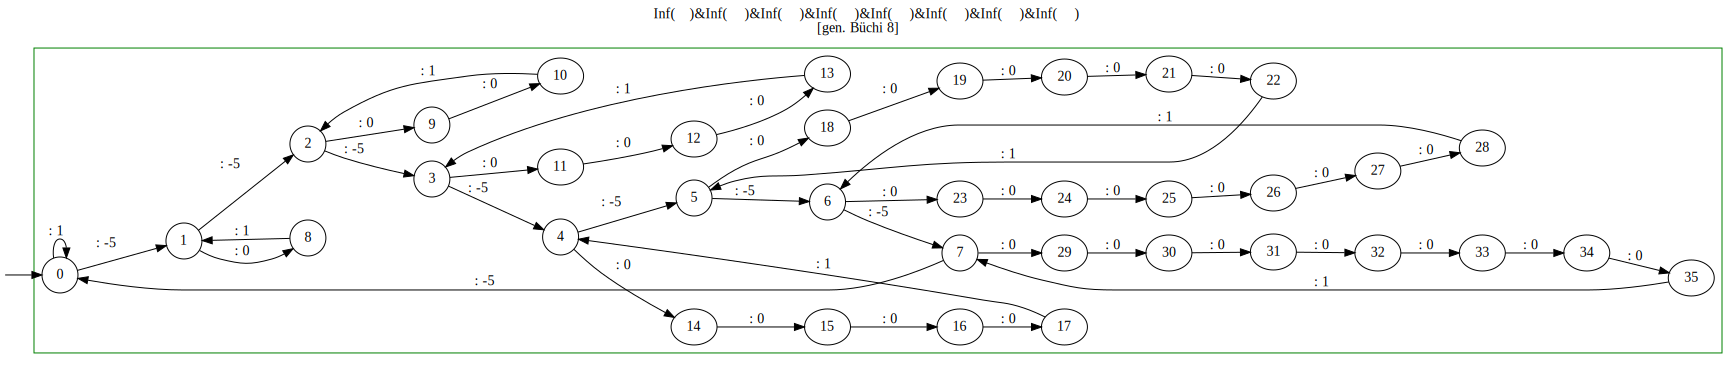

wba has  36  states for  8 colors.


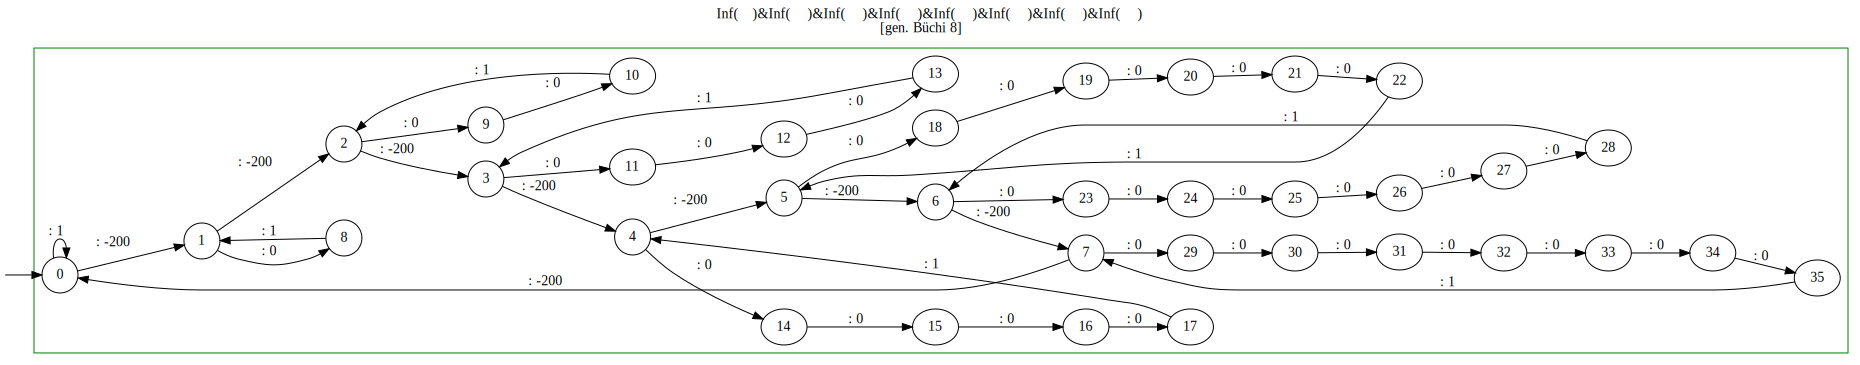

wba has  36  states for  8 colors.


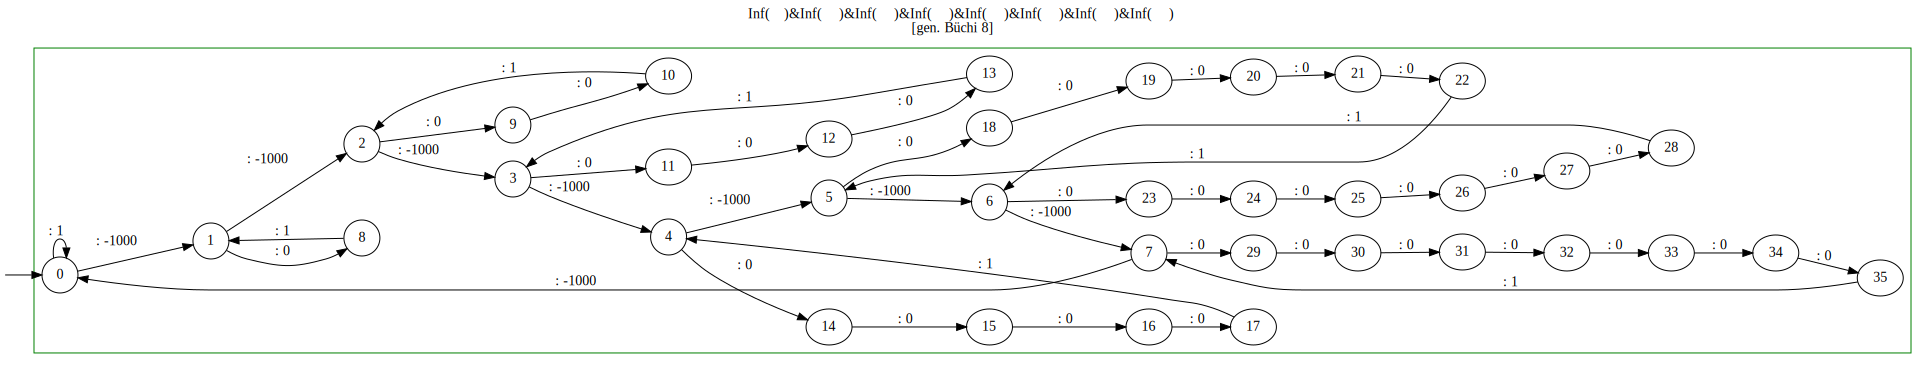

wba has  36  states for  8 colors.


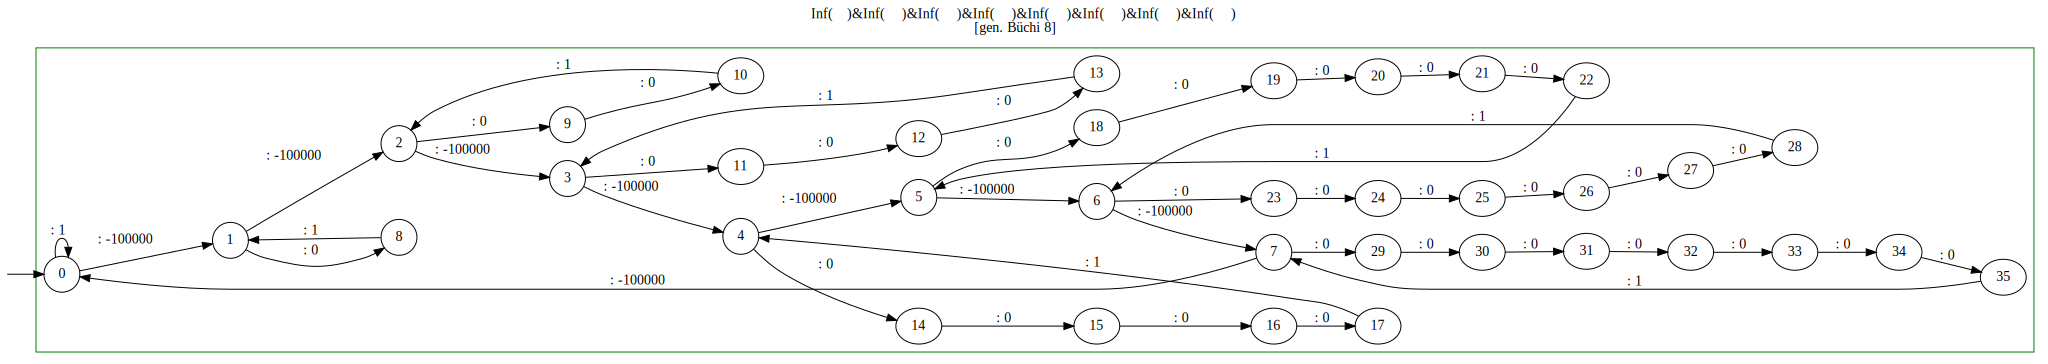

wba has  36  states for  8 colors.


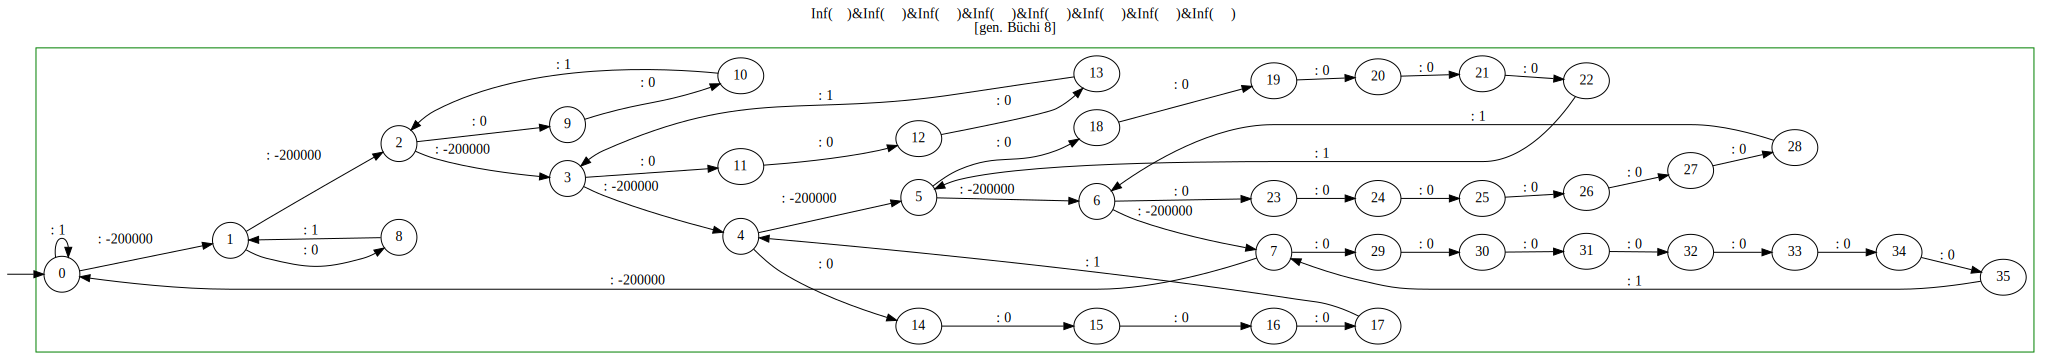

wba has  36  states for  8 colors.


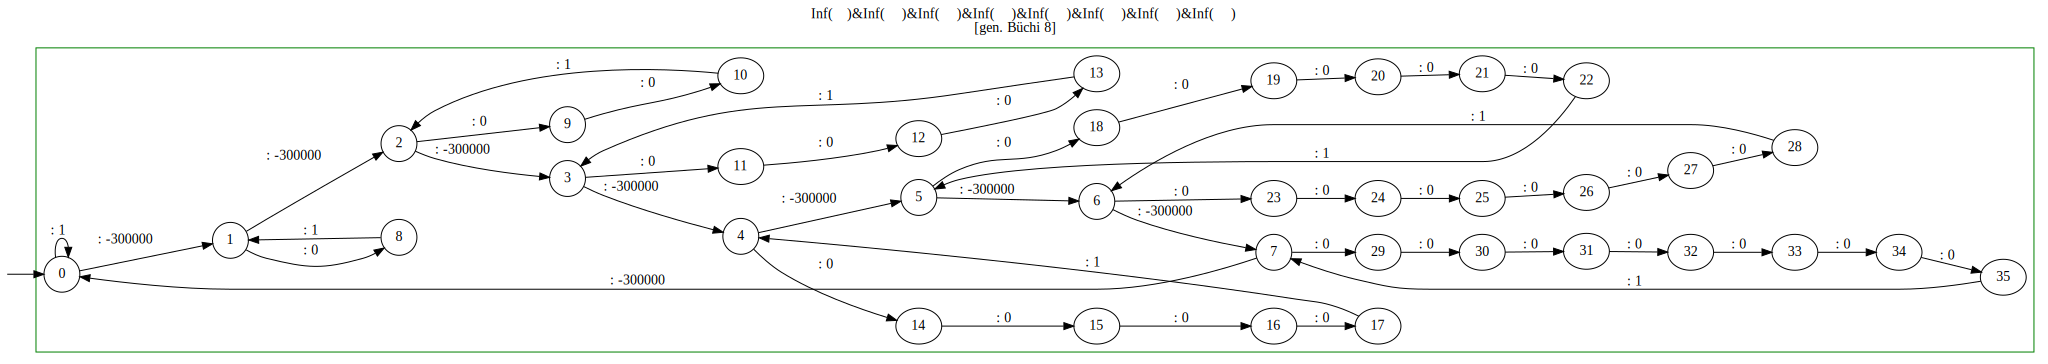

wba has  66  states for  11 colors.
wba has  66  states for  11 colors.
wba has  66  states for  11 colors.
wba has  66  states for  11 colors.
wba has  66  states for  11 colors.
wba has  66  states for  11 colors.
wba has  105  states for  14 colors.
wba has  105  states for  14 colors.
wba has  105  states for  14 colors.
wba has  105  states for  14 colors.
wba has  105  states for  14 colors.
wba has  105  states for  14 colors.
Ncolors is  2 ; Wup is  5 
Stats are  {'n_backedges': 1, 'n_bf_iter': 8, 'n_scc': 1, 'n_pump_loop': 3, 'n_propagate': 58, 'solveTime': 0.0006635189056396484, 'feas': True, 'nstates': 3}
Ncolors is  2 ; Wup is  200 
Stats are  {'n_backedges': 1, 'n_bf_iter': 8, 'n_scc': 1, 'n_pump_loop': 5, 'n_propagate': 60, 'solveTime': 0.0018620491027832031, 'feas': True, 'nstates': 3}
Ncolors is  2 ; Wup is  1000 
Stats are  {'n_backedges': 1, 'n_bf_iter': 8, 'n_scc': 1, 'n_pump_loop': 5, 'n_propagate': 60, 'solveTime': 0.0018830299377441406, 'feas': True, 'nstates': 3}

In [5]:
res = []
tot_time = dict()
WUPlist = [5, 200, 1000, 100000, 200000, 300000]
for Ncolors in range(2, 15, 3):
    tot_time[Ncolors] = []
    for WUP in WUPlist:
        
        wba = spot.make_twa_graph()
        wba.set_generalized_buchi(Ncolors)
        
        n0 = wba.new_states(Ncolors)
        
        for i in range(Ncolors):
            e_idx = wba.new_edge(i, (i+1)%Ncolors, buddy.bddtrue, [ii for ii in range(Ncolors-i-2, Ncolors-i) if ii >= 0])
            spot.set_weight(wba, e_idx, -WUP)
            
            if i == 0:
                e_idx = wba.new_edge(i, i, buddy.bddtrue)
                spot.set_weight(wba, e_idx, 1)
            else:
                hs = wba.new_states(i)
                ls = [i] + [hs + x for x in range(i)]
                e_idx = None
                for ii in range(i+1):
                    e_idx = wba.new_edge(ls[ii], ls[(ii+1)%(i+1)], buddy.bddtrue)
                    spot.set_weight(wba, e_idx, 0)
                spot.set_weight(wba, e_idx, 1)


        print("wba has ", wba.num_states(), " states for ", Ncolors, "colors.")
        if (Ncolors <= 10):
            display(wba.show("tsbrg"))
        WBA_utils.reset_stats()
        t = time.time()
        feas = WBA_utils.BuechiEnergy(wba, 0, WUP, 0, 0)
        stats = deepcopy(WBA_utils.get_stats())
        stats["solveTime"] = time.time()-t
        stats["feas"] = feas
        stats["nstates"] = wba.num_states()
        tot_time[Ncolors].append(stats["solveTime"])
        res.append((Ncolors, WUP, stats))
            
for ncolors, wup, stats in res:
    print("Ncolors is ", ncolors, "; Wup is ", wup, "\nStats are ", stats)

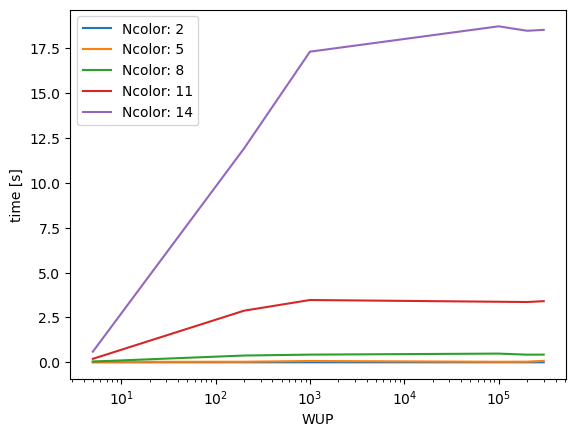

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot showing that runtimes stagnate if WUP is large enough
f,a = plt.subplots(1,1)
a.set_xlabel("WUP")
a.set_ylabel("time [s]")
a.set_xscale("log")
for Ncolor, times in tot_time.items():
    a.plot(WUPlist, times, label=f"Ncolor: {Ncolor}")
a.legend()

## Pipeline for weighted 1-clock timed automata

In [7]:
# Create the corner point abstraction
import to_weighted_twa

to_weighted_twa.translate("tchecker_examples/satellite.tchk")
# The last call generated the hoa files for the corner point abstractions.
# In this case, this is a weighted monitor, that is it contains all possible 
# system behaviours, does however not distinguish between accepting and rejecting

/usr/local/lib/python3.10/dist-packages/spot/__init__.py
./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite.tchk.zg -l Init tchecker_examples/satellite.tchk


./tchecker/build/src/tck-reach: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.38' not found (required by ./tchecker/build/src/tck-reach)
./tchecker/build/src/tck-reach: /lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by ./tchecker/build/src/tck-reach)


CalledProcessError: Command '['./tchecker/build/src/tck-reach', '-a', 'reach', '-C', 'tchecker_examples/satellite.tchk.zg', '-l', 'Init', 'tchecker_examples/satellite.tchk']' returned non-zero exit status 1.

## Adding a specification
We can add a specification in two ways:
Either by directly coloring the cpa as a function of the propositions
Or create an auxialliary automaton and build the synchronous product

In [ ]:
# Direct coloring
wba = spot.automaton("tchecker_examples/satellite.tchk.hoa")
# We need two colors
wba.set_generalized_buchi(2)
tr = buddy.bdd_ithvar(wba.register_ap("tr")) # transmission
dT = buddy.bdd_ithvar(wba.register_ap("dT")) # Time elapse
# Explicitly color the edges
for e in wba.edges():
    if buddy.bdd_implies(e.cond, tr):
        e.acc = e.acc | spot.mark_t([0])
    if buddy.bdd_implies(e.cond, dT):
        e.acc = e.acc | spot.mark_t([1])
display(wba.show("tsbrg"))

In [ ]:
# Solve the energy büchi problem

WBA_utils.BuechiEnergy(wba, 0, 400, 350, 2) 

In [ ]:
# Second approach: Build an auxilliary automaton
mon = spot.automaton("tchecker_examples/satellite.tchk.hoa")
# Time must pass and sending must occur either before sunrise or after sundown
# We impose that we need to send every turn
spec = spot.translate("!ns && G(sd->X(ns U tr) && G(~(ns && sr))) && GF(dT)", dict = mon.get_dict())
spec

In [ ]:
# Build the wba
wba = spot.product(mon, spec)
# Solve
WBA_utils.BuechiEnergy(wba, 0, 400, 350, 2) 

In [ ]:
# Second approach: Build an auxilliary automaton
mon = spot.automaton("tchecker_examples/satellite.tchk.hoa")
# Time must pass and sending must occur either before sunrise or after sundown
# We impose that we need to send every turn
spec = spot.translate("!ns && G(sd->X(ns U tr) && G(~(ns && sr))) && GF(dT)", dict = mon.get_dict())
spec

In [ ]:
# Build the wba
wba = spot.product(mon, spec)
# Solve
WBA_utils.BuechiEnergy(wba, 0, 400, 350, 2) 

In [ ]:
# Second approach: Build an auxilliary automaton
mon = spot.automaton("tchecker_examples/satellite.tchk.hoa")
# Time must pass and sending must occur either before sunrise or after sundown
# We impose that we need to send every turn
spec = spot.translate("!ns && G(sd->X(ns U tr) && G(~(ns && sr))) && GF(dT)", dict = mon.get_dict())
spec

In [ ]:
# Build the wba
wba = spot.product(mon, spec)
# Solve
WBA_utils.BuechiEnergy(wba, 0, 400, 350, 2) 